In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFECV

import seaborn as sns

In [ ]:
!ls

sample_data  test.csv  train.csv


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [ ]:
#checking for constant columns
[a for a in train.columns if train[a].nunique()==1]

[]

In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
train.Item_Weight.fillna(train.Item_Weight.mean(),inplace=True)

In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
test.Item_Weight.fillna(test.Item_Weight.mean(),inplace=True)

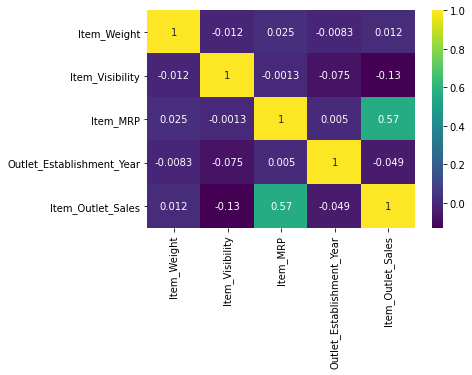

In [ ]:
sns.heatmap(train.corr(),annot=True,fmt='.2g',cmap='viridis')

Item_mrp and item_outlet_sales are highly related



In [ ]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
temp=train[train.Outlet_Size.isnull()][['Outlet_Size','Outlet_Type']]

In [ ]:
temp

,Outlet_Size,Outlet_Type
3,NaN,Grocery Store
8,NaN,Supermarket Type1
9,NaN,Supermarket Type1
25,NaN,Supermarket Type1
28,NaN,Grocery Store
...,...,...
8502,NaN,Supermarket Type1
8508,NaN,Supermarket Type1
8509,NaN,Grocery Store
8514,NaN,Supermarket Type1


In [ ]:
temp.Outlet_Type.value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [ ]:
train.loc[train['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
train.loc[train['Outlet_Type']=='Supermarket Type1','Outlet_Size']=train.Outlet_Size.fillna('Small')
train.loc[train['Outlet_Type']=='Supermarket Type2','Outlet_Size']=train.Outlet_Size.fillna('Medium')

In [ ]:
test.loc[test['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
test.loc[test['Outlet_Type']=='Supermarket Type1','Outlet_Size']=test.Outlet_Size.fillna('Small')
test.loc[test['Outlet_Type']=='Supermarket Type2','Outlet_Size']=test.Outlet_Size.fillna('Medium')

In [ ]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train.Item_Fat_Content=train.Item_Fat_Content.replace('LF','Low Fat').replace('reg','Regular').replace('low fat','Low Fat')

In [ ]:
test.Item_Fat_Content=test.Item_Fat_Content.replace('LF','Low Fat').replace('reg','Regular').replace('low fat','Low Fat')

In [ ]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train['Outlet_Age']=2020-train.Outlet_Establishment_Year
test['Outlet_Age']=2020-test.Outlet_Establishment_Year

In [ ]:
#Get the first two characters of ID:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [ ]:
#Get the first two characters of ID:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
ohe=OneHotEncoder()


In [ ]:
scaler=StandardScaler()
tr_weight=scaler.fit_transform(np.array(train.Item_Weight).reshape(-1,1))
te_weight=scaler.transform(np.array(test.Item_Weight).reshape(-1,1))

In [ ]:
scaler=StandardScaler()
tr_age=scaler.fit_transform(np.array(train.Outlet_Age).reshape(-1,1))
te_age=scaler.transform(np.array(test.Outlet_Age).reshape(-1,1))

In [ ]:
scaler=StandardScaler()
tr_Item_MRP=scaler.fit_transform(np.array(train.Item_MRP).reshape(-1,1))
te_Item_MRP=scaler.transform(np.array(test.Item_MRP).reshape(-1,1))

In [ ]:
scaler=StandardScaler()
tr_Outlet_Establishment_Year=scaler.fit_transform(np.array(train.Outlet_Establishment_Year).reshape(-1,1))
te_Outlet_Establishment_Year=scaler.transform(np.array(test.Outlet_Establishment_Year).reshape(-1,1))

In [ ]:
scaler=StandardScaler()
tr_visibility=scaler.fit_transform(np.array(train.Item_Visibility).reshape(-1,1))
te_visibility=scaler.transform(np.array(test.Item_Visibility).reshape(-1,1))

In [ ]:
train.Item_Fat_Content=pd.get_dummies(train.Item_Fat_Content,drop_first=True)
test.Item_Fat_Content=pd.get_dummies(test.Item_Fat_Content,drop_first=True)


In [ ]:
train.Item_Type=pd.get_dummies(train.Item_Type,drop_first=True)
test.Item_Fat_Content=pd.get_dummies(test.Item_Fat_Content,drop_first=True)

In [ ]:
train.Item_Type_Combined=pd.get_dummies(train.Item_Type_Combined,drop_first=True)
test.Item_Type_Combined=pd.get_dummies(test.Item_Type_Combined,drop_first=True)



In [ ]:
train.Outlet_Location_Type=train.Outlet_Location_Type.str.replace(' ','')
test.Outlet_Location_Type=test.Outlet_Location_Type.str.replace(' ','')

In [ ]:
train.Outlet_Type=train.Outlet_Type.str.replace('Supermarket ','')
test.Outlet_Type=test.Outlet_Type.str.replace('Supermarket ','')

In [ ]:
train.Item_Type=train.Item_Type.astype('str')
test.Item_Type=test.Item_Type.astype('str')

In [ ]:
train.Item_Type=train.Item_Type.str.replace(' ','')
test.Item_Type=test.Item_Type.str.replace(' ','')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Combined
0,FDA15,9.30,0,0.016047,0,249.8092,OUT049,1999,Medium,Tier1,Type1,3735.1380,21,1
1,DRC01,5.92,1,0.019278,0,48.2692,OUT018,2009,Medium,Tier3,Type2,443.4228,11,0
2,FDN15,17.50,0,0.016760,0,141.6180,OUT049,1999,Medium,Tier1,Type1,2097.2700,21,1
3,FDX07,19.20,1,0.000000,0,182.0950,OUT010,1998,Small,Tier3,Grocery Store,732.3800,22,1
4,NCD19,8.93,0,0.000000,0,53.8614,OUT013,1987,High,Tier3,Type1,994.7052,33,0


In [ ]:
le=LabelEncoder()
le_type_tr=le.fit_transform(train.Outlet_Type)
le_type_te=le.transform(test.Outlet_Type)

In [ ]:
le=LabelEncoder()
le_loc_tr=le.fit_transform(train.Outlet_Location_Type)
le_loc_te=le.transform(test.Outlet_Location_Type)

In [ ]:
le=LabelEncoder()
le_loc_tr=le.fit_transform(train.Outlet_Size)
le_loc_te=le.transform(test.Outlet_Size)

In [ ]:
y=train.Item_Outlet_Sales

In [ ]:
## combine all 'one-hot' encoded features as Te.
tr =pd.DataFrame(pd.np.column_stack([ tr_weight,tr_Item_MRP,tr_Outlet_Establishment_Year,tr_visibility,tr_age,le_type_tr,le_loc_tr,le_loc_tr]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=train.values.tolist()
l4=tr.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

train=pd.DataFrame(l3,columns=train.columns.tolist()+tr.columns.tolist())
train.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


(8523, 22)

In [ ]:
## combine all 'one-hot' encoded features as Te.
te =pd.DataFrame(pd.np.column_stack([ te_weight,te_Item_MRP,te_Outlet_Establishment_Year,te_visibility,te_age,le_type_te,le_loc_te,le_loc_te]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows


l3=test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

test=pd.DataFrame(l3,columns=test.columns.tolist()+te.columns.tolist())

test.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


(5681, 21)

In [ ]:
train.drop(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type',  'Outlet_Age', 'Item_Type_Combined'],axis=1,inplace=True)

In [ ]:
test.drop(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type',  'Outlet_Age', 'Item_Type_Combined'],axis=1,inplace=True)

In [ ]:
train.shape

(8523, 9)

In [ ]:
test.shape

(5681, 8)

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
linear_reg=LinearRegression()
train.drop('Item_Outlet_Sales',axis=1,inplace=True)
linear_reg.fit(train,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('slope',linear_reg.coef_)
print("intercept",linear_reg.intercept_)

slope [  -5.21829707  969.90681615   -8.93103212 -104.12272401    8.93103212
  841.125576      5.57973161    5.57973161]
intercept 1154.6905049329312


In [ ]:
y_pred=linear_reg.predict(test)

In [ ]:
test1=pd.read_csv('test.csv')

In [ ]:
test1['Item_Outlet_Sales']=y_pred
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('LinearRegressionSubmission.csv',index=False)

#Ridge regression inorder to avoid overfitting

In [ ]:
ridge=Ridge(alpha=0.05)

ridge.fit(train,y)


Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_pred=ridge.predict(test)
test1['Item_Outlet_Sales']=ridge_pred
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('RidgeSubmission.csv',index=False)

Decision Tree Regresssion

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
dt.fit(train,y)
dt_pred=dt.predict(test)

test1['Item_Outlet_Sales']=dt_pred
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('DecisionTreeRegressorSubmission.csv',index=False)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(max_depth=10,min_samples_leaf=200)
dt1.fit(train,y)
dt_pred1=dt1.predict(test)

test1['Item_Outlet_Sales']=dt_pred1
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('DecisionTreeRegressor1Submission.csv',index=False)


#RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,n_jobs=5,max_depth=10,min_samples_leaf=200)
rf.fit(train,y)
rf_pred=rf.predict(test)

test1['Item_Outlet_Sales']=rf_pred
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('RandomForestRegressorSubmission.csv',index=False)




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
params={
    'bootstrap':[True,False],
    'n_estimators':[int(x) for x in np.linspace(200,2000,50)],
    'max_features':['auto','sqrt'],
    'max_depth':[int(x) for x in np.linspace(10,110,10)],
    'min_samples_leaf':[1,2,50],
    'min_samples_split':[2,5,10]
}
pprint(params)

{'bootstrap': [True, False],
 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 50],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200,
                  236,
                  273,
                  310,
                  346,
                  383,
                  420,
                  457,
                  493,
                  530,
                  567,
                  604,
                  640,
                  677,
                  714,
                  751,
                  787,
                  824,
                  861,
                  897,
                  934,
                  971,
                  1008,
                  1044,
                  1081,
                  1118,
                  1155,
                  1191,
                  1228,
                  1265,
                  1302,
                  1338,
                  1375,
                  1412,
                  

In [ ]:
rf1=RandomForestRegressor()
grid=RandomizedSearchCV(rf1,params,cv=10,random_state=95,n_jobs=-1,n_iter=100)
grid.fit(train,y)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [ ]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=98, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1595, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 98,
 'max_features': 'auto',
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'n_estimators': 1595}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf2=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=98, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1595, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rf2.fit(train,y)
rf_pred2=rf2.predict(test)

test1['Item_Outlet_Sales']=rf_pred2
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('RandomForestRegressor_HPT_Submission.csv',index=False)


#lightgbm

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm

In [ ]:
lgb=lightgbm.LGBMRegressor()
lgb.fit(train,y)
lgb_pred=lgb.predict(test)

test1['Item_Outlet_Sales']=lgb_pred
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('LGBMRegressor_HPT_Submission.csv',index=False)


In [ ]:
import xgboost
xgb=xgboost.XGBRegressor()
xgb.fit(train,y)
xgb_pred=xgb.predict(test)

test1['Item_Outlet_Sales']=xgb_pred
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('XGBRegressor_Submission.csv',index=False)


[16:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

import xgboost
xgb1=xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb1.fit(train,y)
xgb_pred1=xgb1.predict(test)

test1['Item_Outlet_Sales']=xgb_pred1
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('XGBRegressor1_Submission.csv',index=False)


[16:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
import sklearn
ex_tree=sklearn.ensemble.ExtraTreesRegressor()
ex_tree.fit(train,y)
ex_tree_pred=ex_tree.predict(test)

test1['Item_Outlet_Sales']=ex_tree_pred
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('ExtraTreesRegressor.csv',index=False)


In [ ]:
import sklearn
gbdt_tree=sklearn.ensemble.GradientBoostingRegressor()
gbdt_tree.fit(train,y)
gbdt_tree_pred=gbdt_tree.predict(test)

test1['Item_Outlet_Sales']=gbdt_tree_pred
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('GradientBoostingRegressor_Submission.csv',index=False)


In [ ]:
! pip install tpot 
import tpot

In [ ]:
from tpot import TPOTRegressor

In [ ]:
tpot=TPOTRegressor(generations=8)
tpot.fit(train,y)

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=8,
              log_file=None, max_eval_time_mins=5, max_time_mins=None,
              memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=0, warm_start=False)

In [ ]:
tpot_pred=tpot.predict(test)

test1['Item_Outlet_Sales']=tpot_pred
sample = test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
sample.to_csv('TPOTRegressor.csv',index=False)
